<h1 style="text-align: center;">Exploración de Datos: Millaje y Precio en el Mercado Automotriz </h1>

In [1]:
%load_ext autoreload
%autoreload

The data is already cleaned because its gotten from Kaggle

In [2]:
import os 
import sys
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'scripts'))
from IPython.display import clear_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from ipywidgets import interact
from wordcloud import WordCloud

import warnings

# Suppress the specific UserWarning from geopy
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None

import utils

data_file = "car_prices.csv"

PROJECT_DIR = os.path.dirname(os.getcwd())
DATA_DIR = os.path.join(PROJECT_DIR, 'data', 'csv')

DATA_FILE = os.path.join(DATA_DIR, data_file)

df = pd.read_csv(DATA_FILE)

csv = df

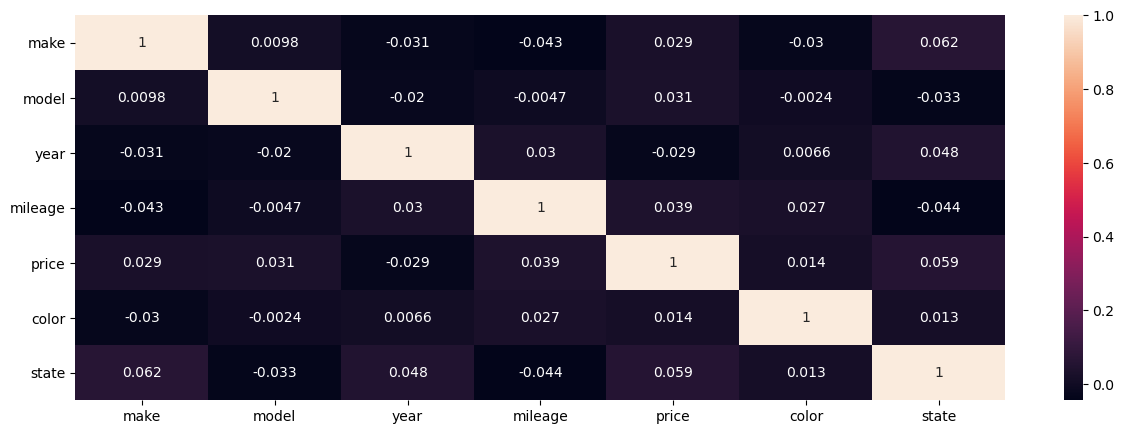

In [3]:
#Correlation
df_corr = csv.copy()
df_corr.drop(["date"], axis=1, inplace=True)
le = LabelEncoder()
for col in df_corr.columns:
  df_corr[col] = le.fit_transform(df_corr[col])
plt.figure(figsize=(15, 5))
sns.heatmap(df_corr.corr(), annot=True)
plt.show()

<h2>The variables with the highest correlation with each other are:</h2>
<strong>Price and mileage:</strong> A positive correlation of 0.039 indicates that higher mileage is associated with lower price.<br/>
<strong>Model and color:</strong> A negative correlation of -0.0326 indicates that certain models may be more associated with certain colors.<br/>
<strong>Make and location:</strong> A positive correlation of 0.0622 indicates that certain makes may be more available in certain locations.<br/>


<h3>The variables with the lowest correlation with each other are:</h3>

<strong>Model and year:</strong> A negative correlation of -0.0198 indicates that the model is not strongly associated with the vehicle year.<br/>
<strong>Color and price:</strong> A positive correlation of 0.0137 indicates that color has a small effect on price.<br/>
<strong>Location and color:</strong> A positive correlation of 0.0132 indicates that location has a small effect on color.<br/>


<h3>Interpretation:</h3>

Mileage has a significant impact on vehicle price, as expected.<br/>
The relationship between model and color may suggest that certain colors are more popular for specific models.<br/>
The relationship between make and location may indicate the concentration of specific makes in certain areas.<br/>
The low correlations between model and year, color and price, and location and color suggest that these factors are not the only determinants of these variables.<br/>


<h3>Limitations:</h3>

The table only shows correlations, not causations.<br/>
The strength of the correlations is relatively weak.<br/>
More data is needed to draw more definitive conclusions.<br/>

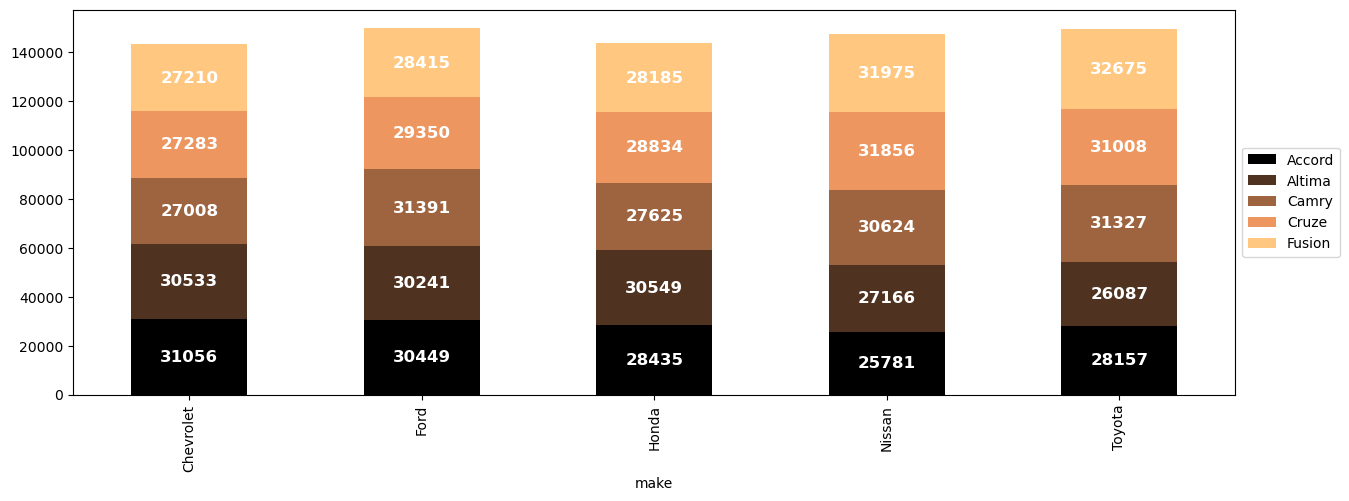

In [13]:
#Barchart
@interact
def barplot(x = csv.drop(["make", "mileage", "price", "date"], axis=1).columns, y = csv[["mileage", "price"]].columns, operation=["mean", "sum", "count"]):
	
	clear_output(wait=True)
	df = csv.groupby(["make", x]).agg({y: operation})
	
	df.reset_index(inplace=True)
	df = df.pivot(index="make", columns=x, values=y)
	ax = df.plot(kind="bar", stacked=True, figsize=(15, 5), colormap="copper")
	for p in ax.patches:
		width, height = p.get_width(), p.get_height()
		x, y = p.get_xy() 
		#change annotate color if height is  greater than the middle of the y axis
		ax.annotate(f'{height:.0f}', (x + width/2, y + height/2), ha='center', va='center', fontsize=12, color='white', weight='bold')
		
	
	ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x:.0f}"))
	plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
	plt.show()

barplot(x = 'model', y = 'price', operation='mean')

En this graph we can see that car references were standardized for comparison. Additionally, it is observed that the car with the highest average mileage is Ford, while the one with the lowest mileage is Honda. There is a similar trend in the sum with respect to Honda; however, in this case, the car that had the highest mileage and price is Nissan. Then, with the count, we can conclude that the reason is that the study was conducted with a considerably larger sample for Nissan compared to the other brands. Regarding the price, it is observed that they have a similar average across all brands and references.

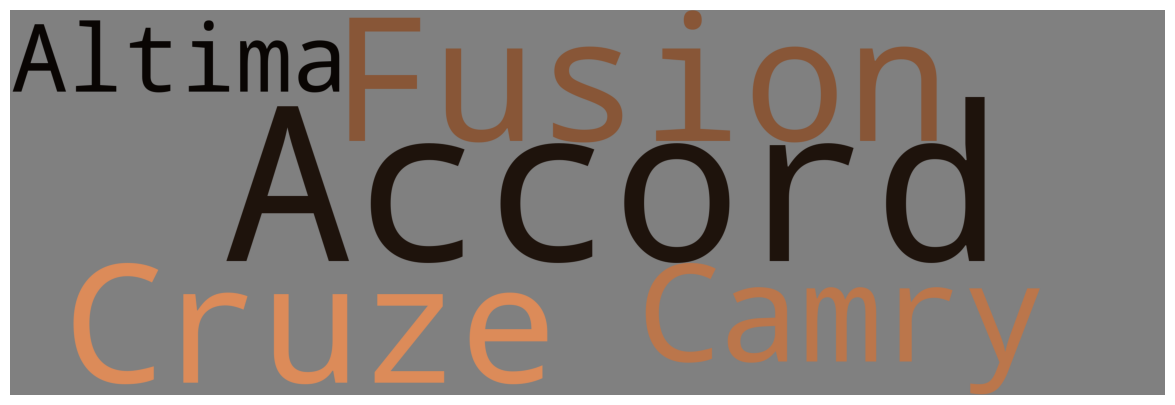

In [17]:
#Wordcloud
@interact
def wcplot(marca = csv["make"].unique()):
	clear_output(wait=True)
	texto = " ".join([mod for mod in csv[csv["make"]==marca]["model"]])
	wc = WordCloud(
		
		width=3000,
		height=1000,
		random_state=1,
		background_color="gray",
		colormap="copper",
		collocations=False,
		
	).generate(text=texto)
	plt.figure(figsize=(15, 5))
	plt.imshow(wc)
	plt.axis('off')
	plt.show()

wcplot(marca = 'Chevrolet')

We created a word cloud as a graphical and interactive representation to visually observe the amount of data collected for each car reference according to the brand. However, it is important to note that this graph does not provide substantial additional information; rather, its utility lies in its visual and didactic nature. In conclusion, while the word cloud offers a visually appealing representation, the interpretation of more significant insights should rely on more detailed quantitative analyses.

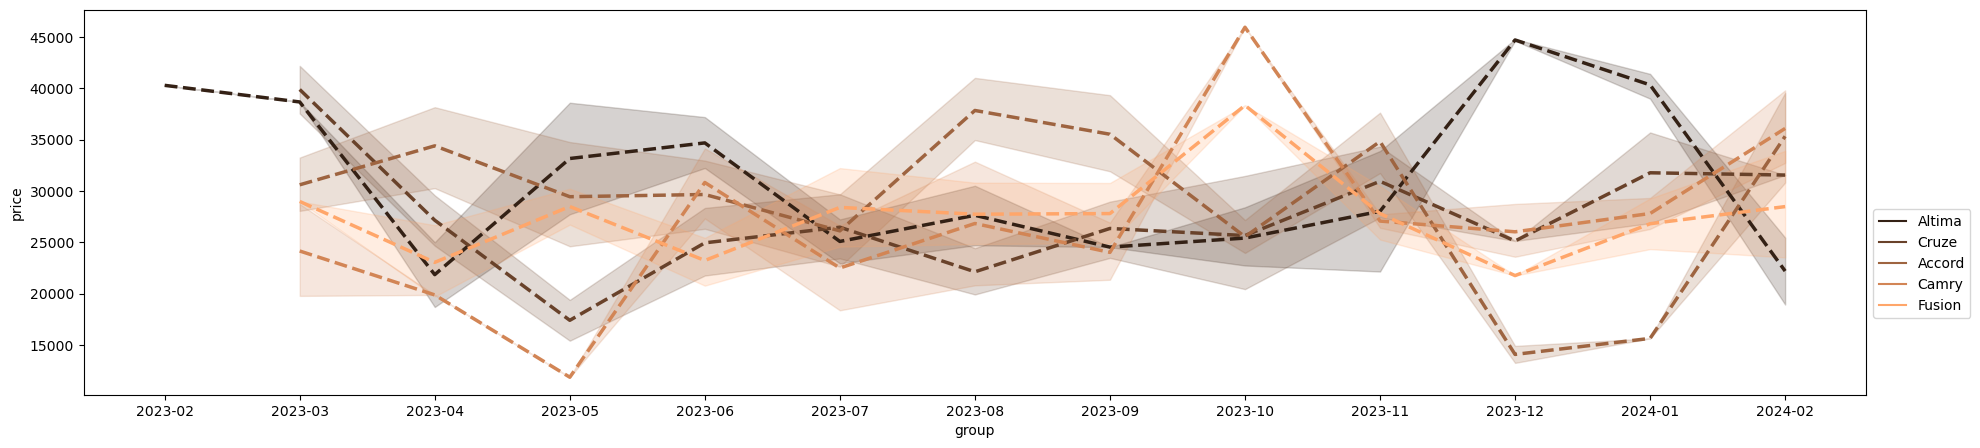

In [16]:
#Time series
@interact
def line_date_plot(x=csv["make"].unique(), y=csv[["mileage", "price"]].columns, fecha = ["Yearly", "Monthly", "Daily"], hue = csv.drop(["make", "mileage", "price", "date", "year"], axis=1).columns):
  clear_output(wait=True)
  dic = {
    "Yearly": "%Y",
    "Monthly": "%Y-%m",
    "Daily": "%d"
  }
  df = csv[csv["make"]==x]
  df=df.assign(date=pd.to_datetime(df['date']).dt.date)
  df["group"] = df["date"].apply(lambda x: x.strftime(f"{dic[fecha]}"))
  df.sort_values(by="group", inplace=True)
  plt.figure(figsize=(23, 5))
  #I want legend on the right bottom
  sns.lineplot(data=df, x="group", y=y, palette="copper", hue=hue, linewidth=2.5, linestyle="dashed")
  plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
  plt.show()
  
line_date_plot(x='Chevrolet', y='price', fecha='Monthly', hue='model')

We created this graph with the purpose of analyzing the linear trend of the price and mileage of cars over time, whether annually, monthly, or in relation to the days of the month. The graph includes shading to clearly visualize the overall trend of all the data. We observe that there is no apparent correlation, and that the references vary in price and mileage depending on the brand. The significant variation in the price of Honda throughout the year in Illinois stands out; additionally, its mileage is notably low in 2024 compared to 2023. Although the monthly data falls within the average, this is due to its annual accumulation. In summary, the absence of correlation suggests the importance of considering additional factors when analyzing the relationship between the price and mileage of cars.

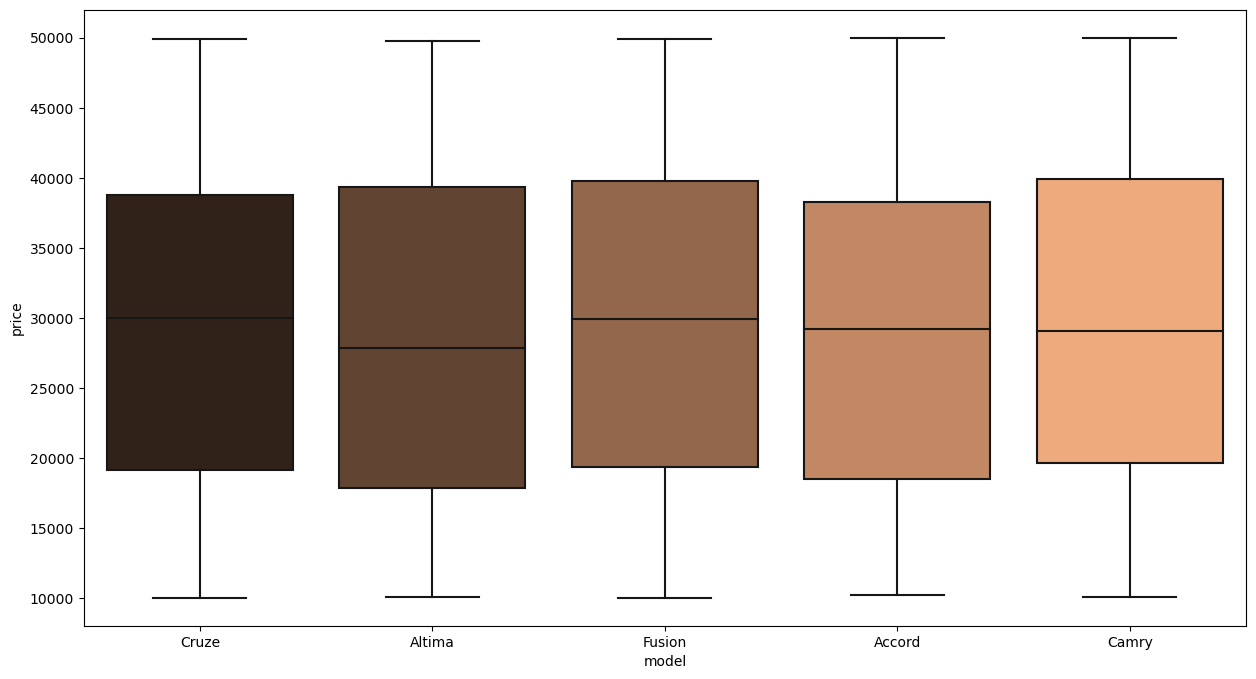

In [14]:
#Boxplot
@interact
def bp(By = csv.drop(["mileage", "price", "date", "year"], axis=1).columns.to_list()):
  clear_output(wait=True)
  df = csv.copy()
  df = df.groupby(By).mean("price")
  df.reset_index(inplace=True)
  df.sort_values(by="price", inplace=True)
  plt.figure(figsize=(15, 8))
  sns.boxplot(data=csv, x=By, y="price", palette="copper")
  plt.show()

bp(By = 'model')

In summary, when analyzing the boxplot graphs of different car brands, a significant similarity is noted in the price ranges, with Honda and Chevrolet standing out for having a noticeably lower median. This suggests that these brands have a higher proportion of lower-priced vehicles compared to others. However, the differences between Toyota, Nissan, and Ford are minimal, indicating homogeneity in their price distributions.

It is crucial to consider that the database used was selected for data science practices and was processed before analysis. This preprocessing may have standardized the information, limiting the ability to draw clear and objective conclusions from the data. Consequently, it emphasizes the importance of considering the context of the database and the potential influence of prior processing on the interpretation of results.